1. 마법공식(PER + ROA)
2. F-Score
3. MAKE_VALUE_COMBO ([PER, PCR, PSR , PBR])
4. ~~~모멘텀 활용~~~


In [2]:
import quant_strategy
import pandas as pd
import const
import data_preperation
import FinanceDataReader as fdr
import matplotlib.pyplot as plt


In [3]:
fs_df = data_preperation.fs_preperation()
price_df = data_preperation.return_price_df()
invest_df = data_preperation.invest_preperation()

In [4]:
def backtest_beta(price_df, strategy_df, start_date, N):
    
    #비교를 위한 KOSPI 지수 시각화
    kospi_index = fdr.DataReader('KS11', start = str(start_date)+'-12', end=str(start_date+1)+'-12')
    ((kospi_index['Close'] / kospi_index['Close'].values[0]) - 1).plot(label='KOSPI_INDEX')
    initial_money = kospi_index['Close'].values[0] * 1000000
    strategy_df['종목명'] = const.ticker_list_to_name(strategy_df.index)
    display(strategy_df)
    code_list = strategy_df.index
    
    strategy_price = price_df[code_list][str(start_date)+'-12':str(start_date+1)+'-11']

    pf_stock_num = {}
    stock_amount = 0
    stock_pf = 0
    each_money = initial_money / len(strategy_df)
    strategy_price = strategy_price.dropna(axis=1)
    for code in strategy_price.columns:
        temp = int( each_money / strategy_price[code][0] )
        pf_stock_num[code] = temp
        stock_amount = stock_amount + temp * strategy_price[code][0]
        stock_pf = stock_pf + strategy_price[code] * pf_stock_num[code]

    cash_amount = initial_money - stock_amount

    backtest_df = pd.DataFrame({'주식포트폴리오':stock_pf})
    backtest_df['현금포트폴리오'] = [cash_amount] * len(backtest_df)
    backtest_df['종합포트폴리오'] = backtest_df['주식포트폴리오'] + backtest_df['현금포트폴리오']
    backtest_df['일변화율'] = backtest_df['종합포트폴리오'].pct_change()
    backtest_df['총변화율'] = backtest_df['종합포트폴리오']/initial_money - 1
    
    backtest_df['총변화율'].plot(label='Strategy')
    
    plt.xlabel('date')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return backtest_df

##### 0-1. 저 PBR 전략

,PBR,PBR순위,종목명
ticker,,,
000950,0.19,1.0,전방
001530,0.25,2.5,DI동일
009200,0.25,2.5,무림페이퍼
005010,0.28,5.0,휴스틸
012320,0.28,5.0,경동인베스트
016610,0.28,5.0,DB금융투자
002200,0.29,7.5,한국수출포장
010100,0.29,7.5,한국프랜지
010770,0.30,9.5,평화홀딩스


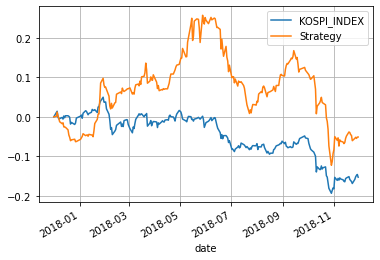

In [5]:
strategy_df = quant_strategy.get_value_rank(invest_df, 'PBR', 2017, 15)
pbr_backtest = backtest_beta(price_df, strategy_df, 2017, 15)

##### 0-2. 저PSR전략

,PSR,PSR순위,종목명
ticker,,,
016380,0.02,1.0,KG동부제철
024900,0.04,2.0,덕양산업
001620,0.06,5.0,케이비아이동국실업
011760,0.06,5.0,현대코퍼레이션
003070,0.06,5.0,코오롱글로벌
007860,0.06,5.0,서연
001020,0.06,5.0,페이퍼코리아
013520,0.07,9.0,화승코퍼레이션
013580,0.07,9.0,계룡건설


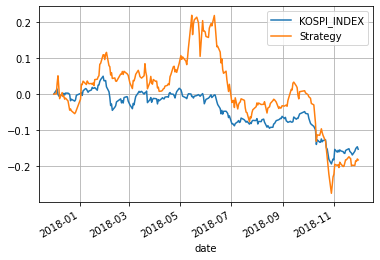

In [6]:
strategy_df = quant_strategy.get_value_rank(invest_df, 'PSR', 2017, 15)
pbr_backtest = backtest_beta(price_df, strategy_df, 2017, 15)

##### 1. 마법공식

,PER,ROA,종목명
ticker,,,
009410,1.40,0.146592,태영건설
000700,1.87,0.160578,유수홀딩스
007120,2.59,0.213434,미래아이앤지
105840,2.60,0.141965,우진
004150,2.27,0.113539,한솔홀딩스
002870,3.71,0.306122,신풍제지
008060,2.33,0.089827,대덕
068290,4.50,0.181943,삼성출판사
092230,1.82,0.082710,KPX홀딩스


,PBR,PCR,PER,PSR,per순위,매출액,매출원가,매출총이익,판매비와관리비,인건비,...,ACCURUAL,LEV,LIQ,OFFER,MARGIN,TURN,roa순위,마법공식 순위,stock_name,종목명
ticker,,,,,,,,,,,,,,,,,,,,,
009410,0.74,1.27,1.40,0.34,1.0,22815.0,18604.0,4211.0,1702.0,597.0,...,0.103731,0.134007,1.292810,NaN,0.184572,0.600663,7.0,1.5,태영건설,태영건설
000700,0.46,1.62,1.87,0.45,4.0,3348.0,2797.0,551.0,703.0,412.0,...,-0.108992,NaN,3.150202,NaN,0.164576,0.672019,4.0,1.5,유수홀딩스,유수홀딩스
007120,0.56,2.55,2.59,8.84,11.0,58.0,29.0,29.0,22.0,12.0,...,-0.180932,NaN,35.176471,NaN,0.500000,0.062839,2.0,3.0,미래아이앤지,미래아이앤지
105840,0.59,2.39,2.60,0.99,12.0,898.0,699.0,198.0,187.0,99.0,...,-0.166528,0.030808,1.313910,NaN,0.220490,0.373855,9.0,4.0,우진,우진
004150,0.31,1.96,2.27,0.45,8.0,3595.0,3173.0,422.0,297.0,133.0,...,-0.098708,0.003987,1.803456,NaN,0.117385,0.573274,21.0,5.0,한솔홀딩스,한솔홀딩스
002870,1.12,3.46,3.71,3.62,34.0,338.0,307.0,31.0,134.0,44.0,...,-0.418367,0.002783,12.018182,NaN,0.091716,0.313544,1.0,6.0,신풍제지,신풍제지
008060,0.40,1.95,2.33,102.15,9.0,34.0,NaN,34.0,74.0,37.0,...,-0.065174,NaN,2.503491,NaN,1.000000,0.002075,40.0,7.0,대덕,대덕
068290,1.68,2.86,4.50,1.43,49.0,1671.0,791.0,880.0,925.0,328.0,...,-0.089261,0.030780,1.554276,NaN,0.526631,0.571477,3.0,8.5,삼성출판사,삼성출판사
092230,0.33,1.50,1.82,0.27,2.0,9532.0,7925.0,1607.0,816.0,256.0,...,-0.029964,0.019485,2.583927,NaN,0.168590,0.561135,50.0,8.5,KPX홀딩스,KPX홀딩스


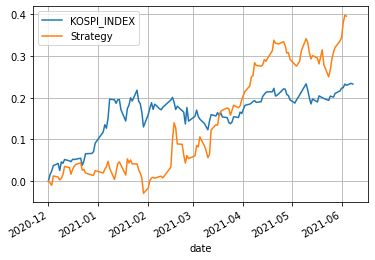

In [46]:
strategy_df = quant_strategy.magic_formula(fs_df, invest_df, 2020, 10)

backtest = backtest_beta(price_df, strategy_df, 2020, 10)

##### 2. F-score

c:\Github\종합설계1\quant_strategy.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_score_df['F_score'] = sum([F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9])


,매출액,매출원가,매출총이익,판매비와관리비,인건비,유무형자산상각비,연구개발비,광고선전비,판매비,관리비,...,ROA,CFO,ACCURUAL,LEV,LIQ,OFFER,MARGIN,TURN,F_score,종목명
ticker,,,,,,,,,,,,,,,,,,,,,
021240,32374.0,10439.0,21935.0,15871.0,4167.0,2550.0,63.0,525.0,4655.0,3032.0,...,0.133674,0.185804,0.052129,0.003103,0.632823,NaN,0.677550,1.068802,9,코웨이
000140,22470.0,12659.0,9811.0,7706.0,2474.0,284.0,NaN,1932.0,962.0,950.0,...,0.016517,0.093624,0.077106,0.027119,0.499157,NaN,0.436627,0.575416,9,하이트진로홀딩스
103140,25936.0,23226.0,2711.0,1499.0,648.0,33.0,127.0,28.0,332.0,328.0,...,0.028174,0.044867,0.016693,0.033072,1.742272,NaN,0.104527,1.016301,9,풍산
001790,12145.0,10656.0,1489.0,1026.0,156.0,34.0,NaN,4.0,325.0,225.0,...,0.019717,0.056535,0.036817,0.078957,1.362126,NaN,0.122602,1.059588,9,대한제당
001070,1752.0,1599.0,153.0,118.0,68.0,9.0,1.0,0.0,7.0,32.0,...,0.012629,0.020112,0.007484,0.001871,1.937626,NaN,0.087329,0.819457,9,대한방직
009830,91950.0,72691.0,19259.0,13317.0,4264.0,1184.0,1044.0,409.0,3104.0,3189.0,...,0.020420,0.070653,0.050234,0.076949,0.944259,NaN,0.209451,0.607440,9,한화솔루션
195870,4587.0,3830.0,758.0,322.0,89.0,9.0,92.0,NaN,94.0,27.0,...,0.078288,0.115866,0.037578,0.073330,1.450000,NaN,0.165250,1.197025,9,해성디에스
011070,95418.0,82514.0,12903.0,6093.0,2701.0,508.0,412.0,NaN,632.0,1438.0,...,0.039098,0.157371,0.118272,0.116153,1.384205,NaN,0.135226,1.580134,9,LG이노텍
049800,2050.0,1518.0,532.0,437.0,186.0,26.0,23.0,2.0,105.0,91.0,...,0.029148,0.108371,0.079223,0.089686,0.703436,NaN,0.259512,0.766069,9,우진플라임


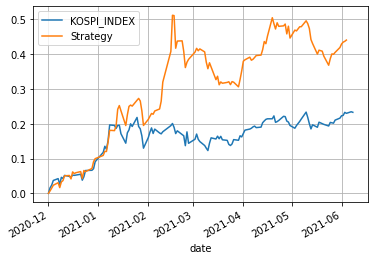

In [40]:
strategy_df = quant_strategy.get_fscore(fs_df, 2020, 15)
backtest = backtest_beta(price_df, strategy_df, 2020, 15)

##### 3. value_combo
가치지표 결합 [PBR, PSR, PCR]

,PBR,PBR순위,PSR,PSR순위,종합순위,종목명
ticker,,,,,,
007860,0.18,1.5,0.04,3.0,1.0,서연
010100,0.20,4.0,0.05,5.5,2.0,한국프랜지
200880,0.18,1.5,0.06,9.5,3.0,서연이화
058650,0.20,4.0,0.08,17.5,4.0,세아홀딩스
001620,0.26,12.5,0.07,12.5,5.0,케이비아이동국실업
000500,0.27,16.0,0.08,17.5,6.0,가온전선
003480,0.24,9.0,0.09,27.5,7.0,한진중공업홀딩스
010690,0.28,20.0,0.08,17.5,8.0,화신
017940,0.30,29.5,0.08,17.5,9.0,E1


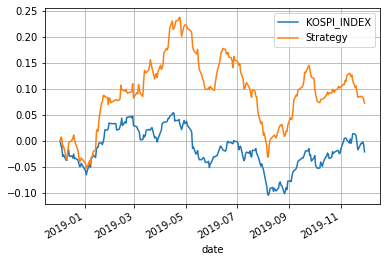

In [42]:
strategy_df = quant_strategy.make_value_combo(['PBR','PSR'],invest_df, 2018, 15)
backtest = backtest_beta(price_df, strategy_df, 2018, 15)

,PBR,PBR순위,PSR,PSR순위,종합순위,종목명
ticker,,,,,,
007860,0.16,2.5,0.03,1.5,1.0,서연
058650,0.16,2.5,0.06,7.5,2.0,세아홀딩스
003030,0.20,6.5,0.07,14.0,3.0,세아제강지주
200880,0.22,11.5,0.07,14.0,4.0,서연이화
003480,0.21,9.0,0.09,28.5,5.0,한진중공업홀딩스
298040,0.27,28.0,0.07,14.0,6.0,효성중공업
009200,0.24,15.0,0.09,28.5,7.0,무림페이퍼
017940,0.28,31.0,0.07,14.0,8.0,E1
001620,0.27,28.0,0.08,20.5,9.0,케이비아이동국실업


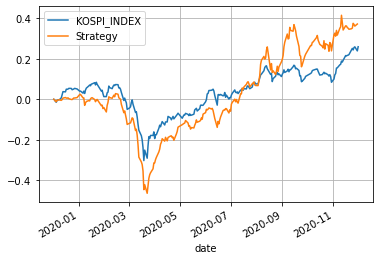

In [30]:
strategy_df = quant_strategy.make_value_combo(['PBR','PSR'],invest_df, 2019, 15)
backtest = backtest_beta(price_df, strategy_df, 2019, 15)

##### 4. 모멘텀 - 결과매우 좋지않음...
- 애초에 우상향 하는 종목들을 추천하는거라, 쭉 우상향한다는 보장도 없고 안좋은듯

In [3]:
# import quant_strategy
# quant_strategy.get_momentum_rank

<function quant_strategy.get_momentum_rank>